# Exploration data analysis (EDA)

In [3]:
import json
import pandas as pd

def load_data():
    with open('../data/01_raw/Jan2020Frontiers.jsonl', 'r') as f:
        list_of_papers = [json.loads(line) for line in f]
    df = pd.DataFrame.from_dict(list_of_papers)
    return df
df = load_data()

In [4]:
df.head(50)

,id,text,journal
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology
5,463298,\n Managing Oil Palm Plantations More Sustaina...,Frontiers in Forests and Global Change
6,488364,\n Differential Regulation of LPS-Mediated VE-...,Frontiers in Cell and Developmental Biology
7,484438,\n Association of T Stage and Serum CEA Levels...,Frontiers in Medicine
8,493109,Alcohol-Specific Computerized Interventions to...,Frontiers in Psychiatry
9,373107,\n \n A Systematic Scoping Review of the Resil...,Frontiers in Public Health


# Train-test split 

<AxesSubplot:xlabel='journal'>

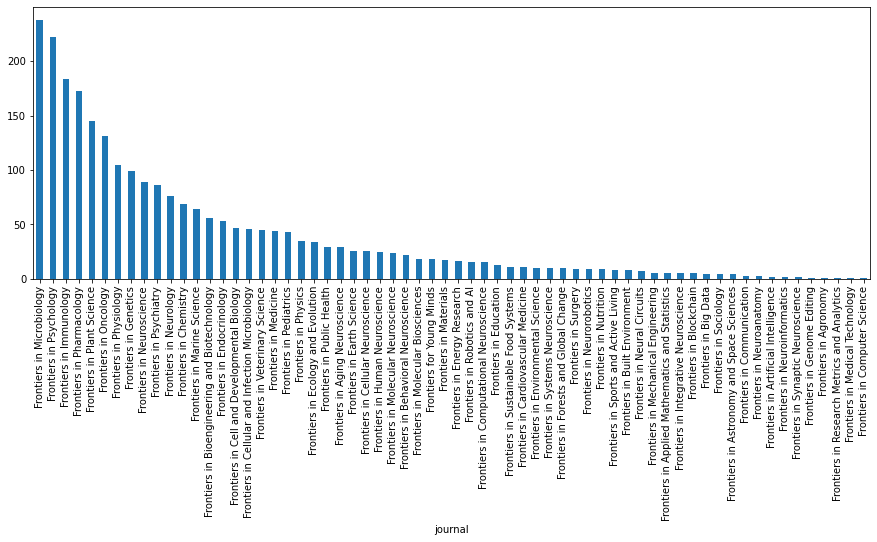

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]

def filter_papers_min_sample(df):
    documents_per_journal = df.groupby(["journal"]).size().sort_values(ascending=False)
    subset_journals = list(documents_per_journal[documents_per_journal >1 ].index)
    df_subset = df[df["journal"].isin(subset_journals)]
    return documents_per_journal, df_subset
documents_per_journal, df_subset = filter_papers_min_sample(df)
documents_per_journal.plot.bar()


In [6]:
documents_per_journal[:3]

journal
Frontiers in Microbiology    238
Frontiers in Psychology      222
Frontiers in Immunology      184
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

def train_test(df_subset):
    X_train, X_test, y_train, y_test = train_test_split(df_subset[["id","text"]],df_subset["journal"].values, 
                                                        test_size=0.33, 
                                                        random_state=42,
                                                        stratify=df_subset["journal"].values)
    df_train = X_train.copy()
    df_train["journal"] = y_train
    df_test = X_test.copy()
    df_test["journal"] = y_test
    return df_train.reset_index(drop=True), df_test.reset_index(drop=True)
df_train, df_test = train_test(df_subset)

In [10]:
import random
journals_list = list(df_train["journal"].unique())
random_solution = []

for i in range(df_train.shape[0]):
    # random_solution.append([random.choice(journals_list),random.choice(journals_list),random.choice(journals_list)])
    random_solution.append(["Frontiers in Microbiology","Frontiers in Psychology","Frontiers in Immunology"])

random_solution[:2]    

[['Frontiers in Microbiology',
  'Frontiers in Psychology',
  'Frontiers in Immunology'],
 ['Frontiers in Microbiology',
  'Frontiers in Psychology',
  'Frontiers in Immunology']]

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def evaluator(y_true, y_pred):
    df_evaluator = pd.DataFrame(y_true,columns=["y_true"])
    df_evaluator["y_pred"] = y_pred
    
    def check_in(row):
        if row["y_true"] in row["y_pred"]:
            return 1
        else:
            return 0
    
    df_evaluator["tp"] = df_evaluator.apply(check_in, axis=1)
    accucary_score = round(df_evaluator["tp"].sum() / df_evaluator.shape[0], 2)
    
    def mean_reciprocal_rank(row):
        if row["y_true"] in row["y_pred"]:
            index = row["y_pred"].index(row["y_true"])
            return 1/(index+1)
        else:
            return 0
    df_evaluator["reciprocal_rank"] = df_evaluator.apply(mean_reciprocal_rank, axis=1)
    
    mean_reciprocal_rank = round(df_evaluator["reciprocal_rank"].sum() / df_evaluator.shape[0],2)

    def get_first_rank(row):
        if row["y_true"] in row["y_pred"]:
            return row["y_true"]
        else:
            return row["y_pred"][0]
    df_evaluator["first_rank"] = df_evaluator.apply(get_first_rank, axis=1)
    
    report = classification_report(df_evaluator["y_true"], df_evaluator["first_rank"])
    
    return df_evaluator, accucary_score, mean_reciprocal_rank, report
df_evaluator, accuracy_score, mean_reciprocal_rank, report = evaluator(df_train["journal"].tolist(), random_solution)

/home/operti/miniconda3/envs/frontiers/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/operti/miniconda3/envs/frontiers/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/operti/miniconda3/envs/frontiers/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [58]:
import json
def generate_evaluation_report( accuracy_score, mean_reciprocal_rank, report, filename):
    eval_report = {"accuracy_total":accuracy_score,
                   "mean_reciprocal_rank":mean_reciprocal_rank,
                   "precision_recall_f1score":report}
    json.dump(eval_report, open(f"../data/05_report/{filename}.json","w"))
generate_evaluation_report(accuracy_score, mean_reciprocal_rank, report, "baseline")    

In [64]:
print(report)

                                                  precision    recall  f1-score   support

                       Frontiers for Young Minds       0.00      0.00      0.00        12
                 Frontiers in Aging Neuroscience       0.00      0.00      0.00        19
 Frontiers in Applied Mathematics and Statistics       0.00      0.00      0.00         3
            Frontiers in Artificial Intelligence       0.00      0.00      0.00         1
       Frontiers in Astronomy and Space Sciences       0.00      0.00      0.00         3
            Frontiers in Behavioral Neuroscience       0.00      0.00      0.00        15
                           Frontiers in Big Data       0.00      0.00      0.00         3
   Frontiers in Bioengineering and Biotechnology       0.00      0.00      0.00        38
                         Frontiers in Blockchain       0.00      0.00      0.00         3
                  Frontiers in Built Environment       0.00      0.00      0.00         5
         

In [13]:
print(f"Accuracy:{accucary_score}; Mean Reciprocal Rank (MRR): {mean_reciprocal_rank}")

Accuracy:0.26; Mean Reciprocal Rank (MRR): 0.16


In [29]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/operti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/operti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/operti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/operti/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [30]:
import re
def find_keywords_rule_based(s):
    start = "Keywords:"
    end = "Citation:"
    s = s.replace(" :",":")
    keywords_list = s[s.find(start)+len(start):s.rfind(end)].replace("\n"," ").replace(":","").split(",")
    keywords_list = [keyword.strip() for keyword in keywords_list ]
    return keywords_list

In [31]:
def add_keywords(df):
    list_of_all_keywords = []
    for i, row in df.iterrows():
        list_of_all_keywords.append(find_keywords_rule_based(row["text"]))
    df["keywords"] = list_of_all_keywords
    df["keywords_len"] = df["keywords"].apply(lambda x: len(x))

In [32]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()    
    word_to_remove = ["google", "scholar"]
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop = set(stopwords.words('english') + list(string.punctuation))
    preprocessed_text = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if (word not in stop) and (len(word) > 3) and (word not in word_to_remove)])
    return preprocessed_text

In [35]:
from summa import keywords

def clean_keywords(row):
    if (row["keywords_len"] < 3) or (row["keywords_len"] > 8): 
        TR_keywords = keywords.keywords(row["text"], scores=True)
        return [key[0] for key in TR_keywords[0:5]]
    else:
        return row["keywords"]

In [36]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=48,progress_bar=True)

def preprocess(df):
    df["preprocessed_text"] = df["text"].parallel_apply(preprocess_text)
    df["keywords"] = df["text"].parallel_apply(find_keywords_rule_based)
    df["keywords_len"] = df["keywords"].parallel_apply(lambda x: len(x))   
    df["keywords_cleaned"] = df.parallel_apply(clean_keywords, axis=1)
    df["keywords_cleaned_len"] =  df["keywords_cleaned"].parallel_apply(lambda x: len(x)) 
    return df
df_train = preprocess(df_train)

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [37]:
df_train["keywords_cleaned_len"].max()

8

In [42]:
import pickle
pickle.dump(df_train, open("../data/02_intermediate/df_train_intermediate.pickle","wb"))

In [43]:
df_train = pickle.load( open("../data/02_intermediate/df_train_intermediate.pickle","rb"))

<AxesSubplot:>

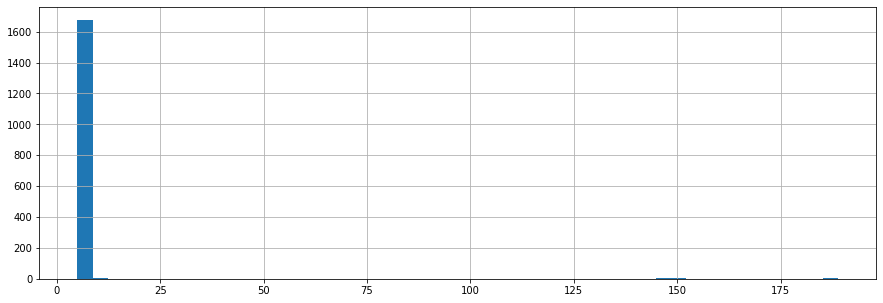

In [44]:
df_train["keywords_len"].hist(bins=50)

In [45]:
import matplotlib.pyplot as plt
df_train[df_train["keywords_len"] >8].shape

(14, 8)

<AxesSubplot:xlabel='journal'>

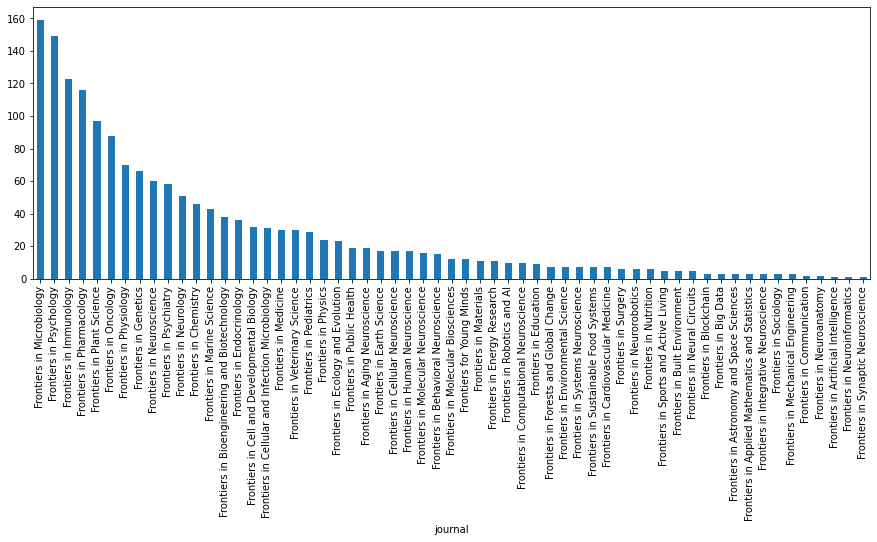

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]
df_train.groupby(["journal"]).size().sort_values(ascending=False).plot.bar()


# SPACY word2vec (keywords)
https://spacy.io/usage/linguistic-features/#vectors-similarity

In [47]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [48]:
df_train.head(2)

,id,text,journal,preprocessed_text,keywords,keywords_len,keywords_cleaned,keywords_cleaned_len
0,494570,\n \n Low Testosterone in Adolescents & Young ...,Frontiers in Endocrinology,testosterone adolescent young adult jordan coh...,"[testosterone, obesity, diabetes, adolescence,...",5,"[testosterone, obesity, diabetes, adolescence,...",5
1,483146,\n Dynamics and Outcome of Macrophage Interact...,Frontiers in Cellular and Infection Microbiology,dynamic outcome macrophage interaction salmone...,"[S . Typhimurium, S . Gallinarum, S . Dublin, ...",5,"[S . Typhimurium, S . Gallinarum, S . Dublin, ...",5


In [49]:
import numpy as np

def get_embeddings_keyword(list_of_keywords):
    vectors = []
    for key in list_of_keywords:
        key_doc = nlp(key)
        vectors.append(key_doc.vector)
    return np.array(vectors).mean(axis=0)

In [52]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=48,progress_bar=True)

def create_embeddings_keywords_spacy(df):
    df["keywords_embeddings"] = df["keywords_cleaned"].parallel_apply(get_embeddings_keyword)
    journal_embeddings = df.groupby(["journal"])["keywords_embeddings"].mean().to_frame().reset_index()
    return df, journal_embeddings
df_train, journal_embeddings_keywords_spacy = create_embeddings_keywords_spacy(df_train)

INFO: Pandarallel will run on 48 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [54]:
journal_embeddings_keywords_spacy

,journal,keywords_embeddings
0,Frontiers for Young Minds,"[-0.08570588, 0.02701054, -0.12668985, -0.1186..."
1,Frontiers in Aging Neuroscience,"[-0.038130574, 0.11526992, -0.07532808, -0.050..."
2,Frontiers in Applied Mathematics and Statistics,"[-0.18782341, 0.20142996, -0.044225156, 0.0532..."
3,Frontiers in Artificial Intelligence,"[0.0352013, 0.18429579, 0.073608205, -0.058178..."
4,Frontiers in Astronomy and Space Sciences,"[0.027815523, 0.21712697, 0.018535538, 0.09711..."
5,Frontiers in Behavioral Neuroscience,"[-0.048327927, 0.114148855, -0.08411286, -0.01..."
6,Frontiers in Big Data,"[-0.14480886, 0.06707003, -0.018787785, -0.058..."
7,Frontiers in Bioengineering and Biotechnology,"[-0.17983378, 0.18328458, -0.055187143, -0.027..."
8,Frontiers in Blockchain,"[0.084761165, 0.04422227, 0.09250609, 0.017255..."
9,Frontiers in Built Environment,"[-0.016105514, 0.28125733, -0.04629258, -0.023..."


In [53]:
df_train.head(2)

,id,text,journal,preprocessed_text,keywords,keywords_len,keywords_cleaned,keywords_cleaned_len,keywords_embeddings
0,494570,\n \n Low Testosterone in Adolescents & Young ...,Frontiers in Endocrinology,testosterone adolescent young adult jordan coh...,"[testosterone, obesity, diabetes, adolescence,...",5,"[testosterone, obesity, diabetes, adolescence,...",5,"[-0.3351562, 0.561118, -0.121553615, 0.1798920..."
1,483146,\n Dynamics and Outcome of Macrophage Interact...,Frontiers in Cellular and Infection Microbiology,dynamic outcome macrophage interaction salmone...,"[S . Typhimurium, S . Gallinarum, S . Dublin, ...",5,"[S . Typhimurium, S . Gallinarum, S . Dublin, ...",5,"[0.054921, 0.26597315, -0.21154206, -0.0300339..."


In [60]:
journal_embeddings_keywords_spacy.head(2)

,journal,keywords_embeddings
0,Frontiers for Young Minds,"[-0.08570588, 0.02701054, -0.12668985, -0.1186..."
1,Frontiers in Aging Neuroscience,"[-0.038130574, 0.11526992, -0.07532808, -0.050..."


In [146]:
from sklearn.metrics.pairwise import cosine_similarity
index = 14
cosine_sim = cosine_similarity(df["keywords_embeddings"][index].reshape(1,-1), np.stack(journal_embeddings["keywords_embeddings"].values))
cosine_sim

array([[0.50726074, 0.51568997, 0.5838501 , 0.557706  , 0.52329665,
        0.5100353 , 0.538583  , 0.6287531 , 0.59479153, 0.35973155,
        0.6436441 , 0.44694018, 0.47793683, 0.43849185, 0.53674054,
        0.59000784, 0.42205784, 0.55904466, 0.40350667, 0.7730214 ,
        0.7905419 , 0.50404793, 0.5031027 , 0.5991471 , 0.7571712 ,
        0.8507979 , 0.5893229 , 0.44723868, 0.56165195, 0.48336497,
        0.53922653, 0.78621066, 0.5424148 , 0.59364027, 0.4107512 ,
        0.54840195, 0.61265206, 0.55753666, 0.49499887, 0.4542924 ,
        0.38982505, 0.5239486 , 0.51916605, 0.5263492 , 0.56998134,
        0.56746614, 0.4774621 , 0.49184275, 0.52782094, 0.60036546,
        0.571319  , 0.69894564, 0.5244699 , 0.5461649 , 0.5807305 ,
        0.42773446, 0.524528  , 0.47397375, 0.51960313, 0.46375048,
        0.75303113, 0.41075805, 0.5034278 , 0.57995033]], dtype=float32)

In [147]:
idx = (-cosine_sim[0]).argsort()[:3]
idx

array([25, 20, 31])

In [148]:
df["journal"][index], journal_embeddings["journal"][idx[0]], journal_embeddings["journal"][idx[1]], journal_embeddings["journal"][idx[2]] 

('Frontiers in Ecology and Evolution',
 'Frontiers in Forests and Global Change',
 'Frontiers in Ecology and Evolution',
 'Frontiers in Marine Science')

In [194]:
# custom test
keywords_embeddings_test = get_embeddings_keyword([ "physics of cities", "census", "racial residential segregation", "gentrification", "city clustering algorithm"])
cosine_sim = cosine_similarity(keywords_embeddings_test.reshape(1,-1), np.stack(journal_embeddings["keywords_embeddings"].values))
idx = (-cosine_sim[0]).argsort()[:3]
journal_embeddings["journal"][idx[0]], journal_embeddings["journal"][idx[1]], journal_embeddings["journal"][idx[2]]

('Frontiers in Sociology',
 'Frontiers in Public Health',
 'Frontiers in Environmental Science')

# SPACY word2vec (whole document)

In [156]:
def get_document_embedding(text):
    doc = nlp(text)
    return doc.vector

In [159]:
pandarallel.initialize(nb_workers=7,progress_bar=True)

df["embeddings_preproceed_text"] = df["preprocessed_text"].parallel_apply(get_document_embedding)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [160]:
journal_embeddings_whole_text = df.groupby(["journal"])["embeddings_preproceed_text"].mean().to_frame().reset_index()


In [161]:
df.head()

,id,text,journal,keywords,keywords_len,preprocessed_text,keywords_embeddings,embeddings_preproceed_text
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,"[inflammatory bowel disease, arthritis, sleep ...",5,sleep characteristics influencing factors slee...,"[-0.19882119, 0.32291594, -0.27029547, -0.0390...","[-0.14144625, 0.19849797, -0.13403033, 0.05077..."
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,"[type 2 diabetes mellitus, machine learning, h...",6,hybrid approach modeling type diabetes mellitu...,"[-0.17922127, 0.32079363, -0.09769386, 0.04941...","[-0.1051252, 0.16541193, -0.067528166, 0.01435..."
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,"[socioeconomic status, self-concept, school ac...",5,relationship academic achievement junior high ...,"[-0.13371883, 0.17204794, -0.029828792, -0.094...","[-0.096085764, 0.15218453, -0.0245518, 0.01957..."
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,"[G x E, Africa, environmental, pesticides, met...",7,environmental health research africa important...,"[-0.35752907, 0.31384423, -0.06836276, -0.0358...","[-0.09711438, 0.104003854, -0.022595188, 0.090..."
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,"[thyroid hormone, 3, 5-diiodothyronine, hypoth...",9,"3,5-t2—a janus-faced thyroid hormone metabolit...","[-0.17045988, 0.22827056, -0.1552076, 0.135012...","[-0.08338285, 0.16250584, -0.11525327, 0.10031..."


In [190]:
index = 7
cosine_sim = cosine_similarity(df["embeddings_preproceed_text"][index].reshape(1,-1), np.stack(journal_embeddings_whole_text["embeddings_preproceed_text"].values))
cosine_sim

array([[0.82183737, 0.93559927, 0.7924809 , 0.8350165 , 0.9229171 ,
        0.81971055, 0.9152569 , 0.8381097 , 0.9021582 , 0.78838116,
        0.84372663, 0.9504678 , 0.90504014, 0.89830285, 0.9253841 ,
        0.8487728 , 0.8124156 , 0.8661909 , 0.8246237 , 0.82364446,
        0.8705696 , 0.8200557 , 0.95583075, 0.82003087, 0.8355962 ,
        0.82864535, 0.9283372 , 0.8913353 , 0.8998831 , 0.9266007 ,
        0.91021997, 0.8575944 , 0.8092152 , 0.8014112 , 0.88489   ,
        0.959232  , 0.89950794, 0.89822936, 0.90245056, 0.8948908 ,
        0.89706314, 0.88120764, 0.9492162 , 0.84284425, 0.9172355 ,
        0.93018275, 0.96958315, 0.95373166, 0.941096  , 0.8392121 ,
        0.9309617 , 0.8796777 , 0.9173789 , 0.876785  , 0.8931234 ,
        0.82287395, 0.8310114 , 0.8216346 , 0.8807856 , 0.9470755 ,
        0.82741493, 0.8697964 , 0.9003209 , 0.9350507 ]], dtype=float32)

In [191]:
idx = (-cosine_sim[0]).argsort()[:3]

In [192]:
df["journal"][index], journal_embeddings_whole_text["journal"][idx[0]], journal_embeddings_whole_text["journal"][idx[1]], journal_embeddings_whole_text["journal"][idx[2]] 

('Frontiers in Medicine',
 'Frontiers in Oncology',
 'Frontiers in Medicine',
 'Frontiers in Endocrinology')

In [193]:
# Custom
text = """Racial residential segregation is interconnected with several other phenomena such as income inequalities, property values inequalities, and racial disparities in health and education. Furthermore, recent literature suggests the phenomenon of gentrification as a cause of perpetuation or increase of racial residential segregation in some American cities. In this paper, we analyze the dynamics of racial residential segregation for white, black, Asian, and Hispanic citizens in New York City in 1990, 2000, and 2010. It was possible to observe that segregation between white and Hispanic citizens and between white and Asian ones has grown, while segregation between white and black is relatively stable. Furthermore, we analyzed the per capita income and the Gini coefficient in each segregated zone, showing that the highest inequalities occur in the zones where there is an overlap of high-density zones of pair of races. Focusing on the changing of the density of population across the city during these 20 years, and by analyzing white and black people’s segregation, our analysis reveals that a positive flux of white (black) people is associated with a substantial increase (decrease) of the property values, as compared with the city mean. Furthermore, by clustering the region with the higher density of black citizens, we measured the variation of area and displacement of the four most significant clusters from 1990 to 2010. The large displacements (≈1.6km) observed for two of these clusters, namely, one in the neighborhood of Harlem and the other inside the borough of Brooklyn, led to the emergence of typically gentrified regions."""
document_embeddings_test = get_document_embedding(text)
cosine_sim = cosine_similarity(document_embeddings_test.reshape(1,-1), np.stack(journal_embeddings_whole_text["embeddings_preproceed_text"].values))
idx = (-cosine_sim[0]).argsort()[:3]
journal_embeddings_whole_text["journal"][idx[0]], journal_embeddings_whole_text["journal"][idx[1]], journal_embeddings_whole_text["journal"][idx[2]]

('Frontiers for Young Minds',
 'Frontiers in Sociology',
 'Frontiers in Public Health')

# Sentence Transformers BERT (only keywords)

# Sentence Transformers with SciBERT  (only keywords)


# Sentence Transformers BERT (whole document)

Only feaseable with GPU

# Sentence Transformers with SciBERT  (whole document)

Only feaseable with GPU

In [6]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('allenai/scibert_scivocab_uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
df["text"][0].split(". ")

['\n Sleep Characteristics and Influencing Factors of Sleep Quality in Patients With Inflammatory Bowel Disease-Peripheral Arthritis \n \n Yin Zhang 1 † ,  Bin Pi 2 † ‡ ,  Xianlin Xu 1 ,  Ying Li 3 ,  Xiangfan Chen 3 ,  Ningxi Yang 4 *  and  Xiaoyan Li 3 \n \n 1 Department of Gastroenterology, Huiyang Sanhe Hospital, Huizhou, China \n 2 Department of Orthopedics, Fifth Affiliated Hospital, Guangzhou Medical University, Guangzhou, China \n 3 School of Health Science, Wuhan University, Wuhan, China \n 4 College of Humanities and Social Sciences, Harbin Engineering University, Harbin, China \n \n Background:  Patients with inflammatory bowel disease-peripheral arthritis (IBD-PA) often accompany by sleep problems, but few studies have used polysomnography to investigate the objective sleep characteristics of IBD-PA',
 '\n Methods:  Patients in IBD-PA group, inflammatory bowel disease (IBD) group, healthy control (HC) group were examined by polysomnography (PSG) and the sleep characteristic

In [53]:
import numpy as np
def get_doc_embeddings_bert(text):
    sentences = text.split(". ")
    embeddings = model.encode(sentences)
    doc_embeddings_bert = np.mean(embeddings, axis=0)
    return doc_embeddings_bert

In [55]:
text = df["text"][0]
get_doc_embeddings_bert(text)

array([-0.66781706,  0.24296108, -0.04957093, -0.17639278, -0.2589734 ,
        0.07442345, -0.25876293, -0.14203766, -0.09850138, -0.00230448,
        0.52635366, -0.13941966, -0.02832645,  0.13385026, -0.2838427 ,
        0.12234153, -0.16152292, -0.00152437,  0.564619  ,  0.26419577,
        0.02726902,  0.06813429,  0.2783701 , -0.09753691, -0.2787659 ,
        0.05814543, -0.30563346, -0.07554113, -0.20844828, -0.44558436,
        0.1832341 ,  0.26399025,  0.09474081,  0.41053587, -0.01212333,
        0.02974139,  0.48768717, -0.04848086,  0.0845094 , -0.04187105,
       -0.0273311 , -0.18245909,  0.18992195,  0.32025495,  0.16291533,
       -0.30250868,  0.36970222,  0.02290853, -0.3123043 ,  0.2726394 ,
        0.34825733,  0.05387367,  0.37505442, -0.16196667, -0.18153793,
       -0.39513654, -0.43422344, -0.00259814, -0.19940825, -0.21230572,
        0.18739343, -0.22030506, -0.21173397,  0.17880014, -0.4676171 ,
        0.02103107,  0.09145419, -0.12812766,  0.20799133,  0.05

In [58]:
df["embeddings_text_bert"] = df["text"].apply(get_doc_embeddings_bert)

KeyboardInterrupt: 